* data:  GTEx count data with $(n,p) = (11688,55863)$

* method: 
    * apply `rsvd` to count data $X$ with D = 200
    * Use the $d = 50$ top components to approximate count with $\hat{X}$ (set negative elements to 0)
    * apply `fronmf` (NMF_fro with lee's mu update) to $\hat{X}$
 
* comoparison
    * apply `fronmf` directly to original data $X$
    * compare the error from two algorithms
    * compare factors
    
    
* Result:
    * The quality of approximation of original data using first 50 components is shown https://github.com/zihao12/lowrank-nmf/blob/master/output/gtex_approx_rsvd_d50_scatter.png
    * The loss vs niter are shown below (a little bit hard to visualize). Not sure how to make sense of the difference in loss
    
    * The factors from both methods are quite similar

# Loss

min cost for fronmf on X:     1.489976e+16
min cost for rsvdfronmf on X: 1.490496e+16


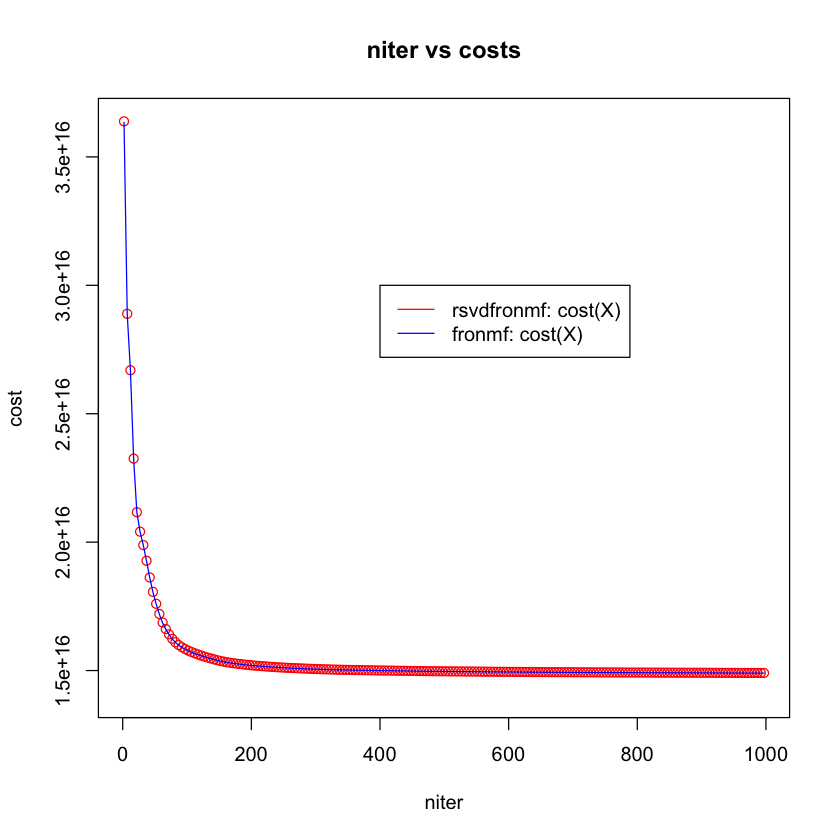

In [1]:
err0 = read.csv("../bigdata/gtex_error_fronmf.csv", header = F) 
err0 = err0[2:nrow(err0),] ## small bug causes wrong calculation of the first cost
err = read.csv("../bigdata/gtex_error_rsvdfronmf_d200.csv", header = F)
err = err[2:nrow(err),] ## small bug causes wrong calculation of the first cost

cat(sprintf("min cost for fronmf on X:     %12e\n", min(err0)))
cat(sprintf("min cost for rsvdfronmf on X: %12e\n", min(err[,1])))

niter = nrow(err)
idx = seq(2,niter, 5)
plot(idx, err[idx,1], col = "red",  xlab = "niter", ylab = "cost",
    main = "niter vs costs", ylim = c(min(err[idx,]), max(err[idx,])))
lines(idx,err0[idx], col = "blue")
# plot(idx,err0[idx,1], col = "blue")
# plot(idx,err0[idx,1] -err[idx, 1], col = "blue")

legend(x = 400, y = 3e+16, legend = c("rsvdfronmf: cost(X)", "fronmf: cost(X)"), 
       col = c("red", "blue"), lty = 1:1:1)


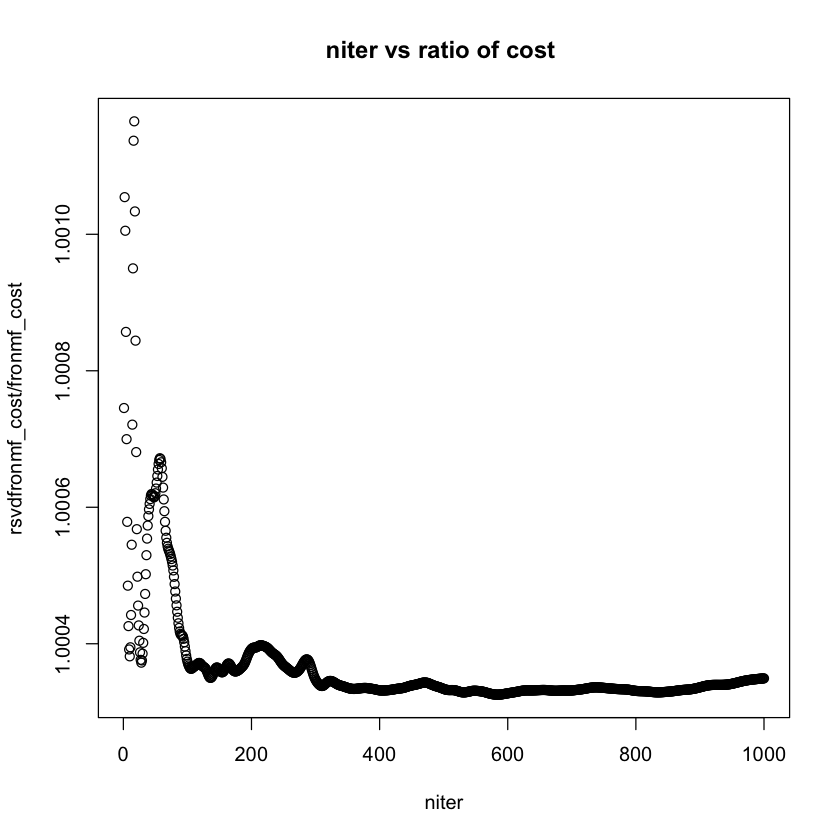

In [2]:
plot(err[,1]/err0, ylab = "rsvdfronmf_cost/fronmf_cost", xlab = "niter", main = "niter vs ratio of cost ")

# Compare factor/loadings

In [3]:
datadir = "../bigdata/"
method1 = "fronmf"
method2 = "rsvdfronmf_d200"
fname1 = sprintf("gtex_factors_%s.csv", method1)
fname2 = sprintf("gtex_factors_%s.csv", method2)
f1 = read.csv(sprintf("%s%s", datadir, fname1), header = F)
f2 = read.csv(sprintf("%s%s", datadir, fname2), header = F)

lname1 = sprintf("gtex_loadings_%s.csv", method1)
lname2 = sprintf("gtex_loadings_%s.csv", method2)
l1 = read.csv(sprintf("%s%s", datadir, lname1), header = F)
l2 = read.csv(sprintf("%s%s", datadir, lname2), header = F)

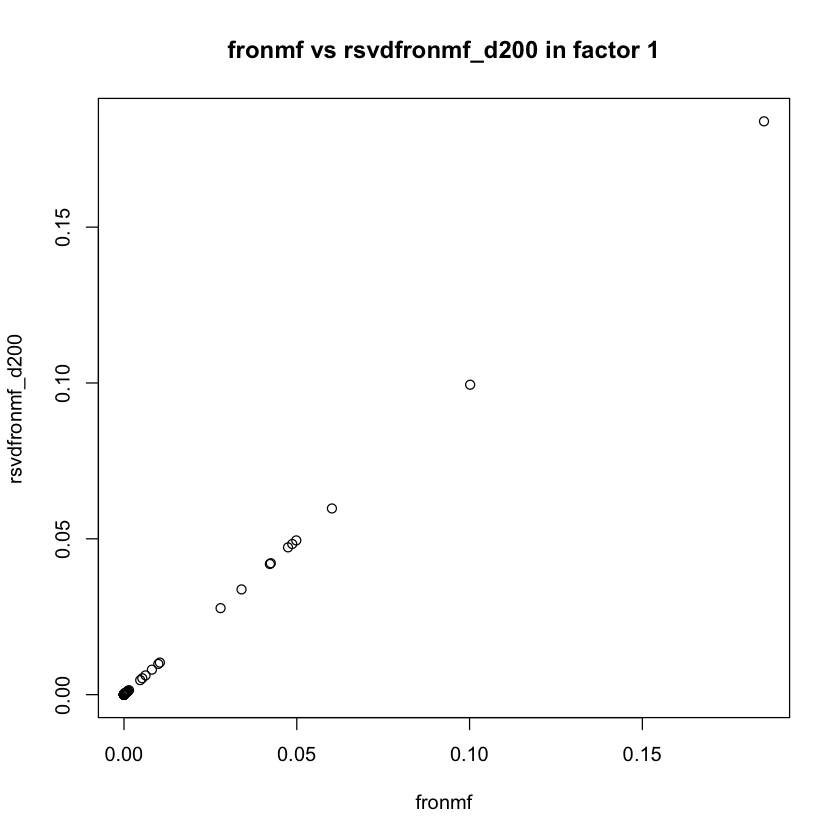

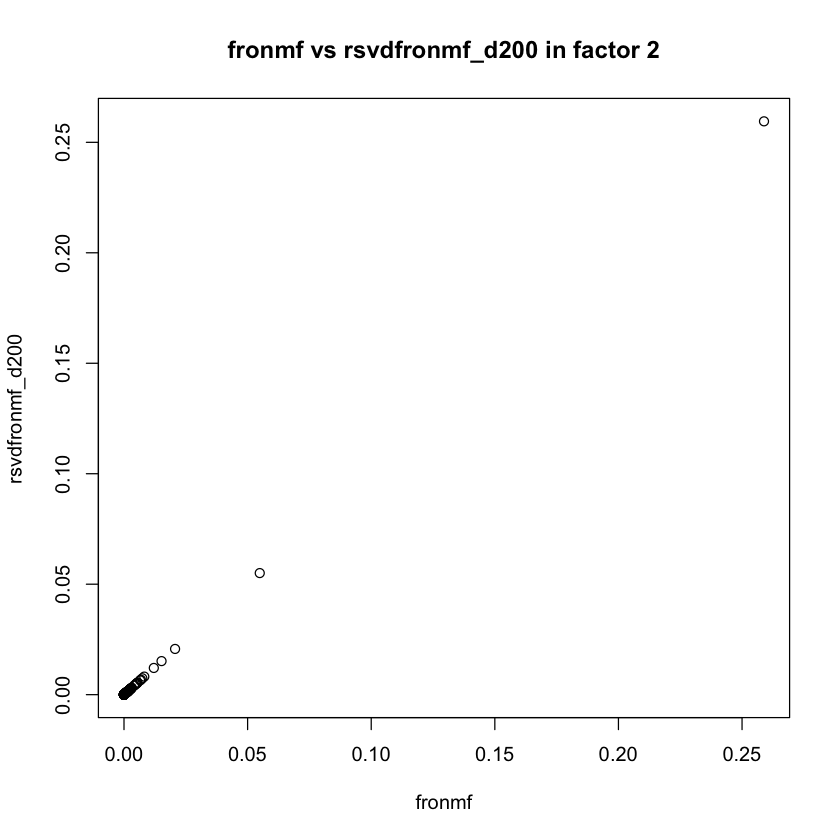

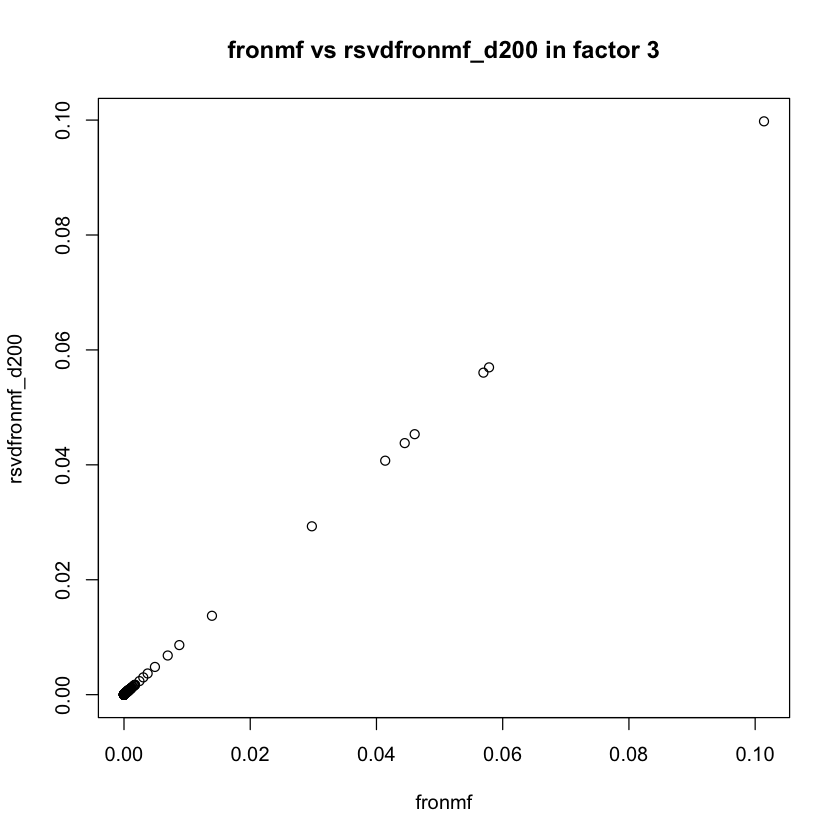

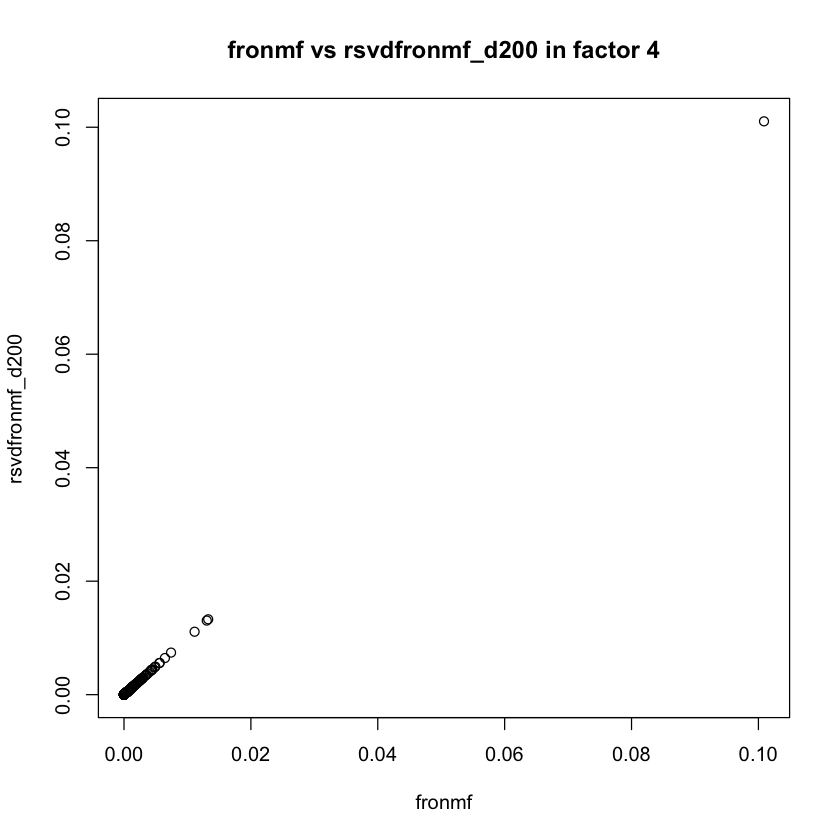

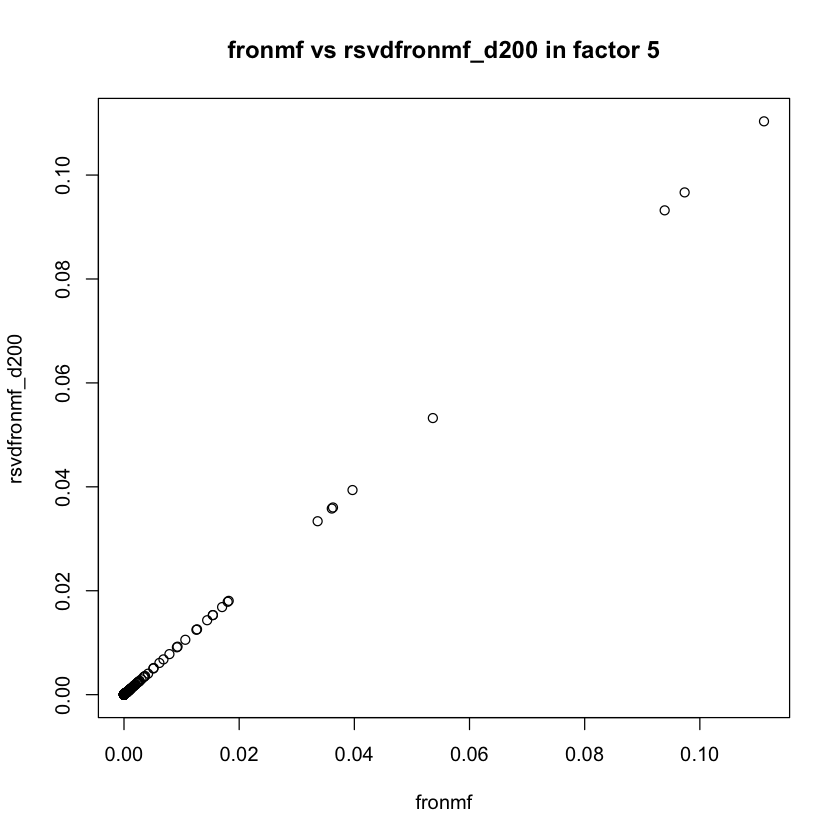

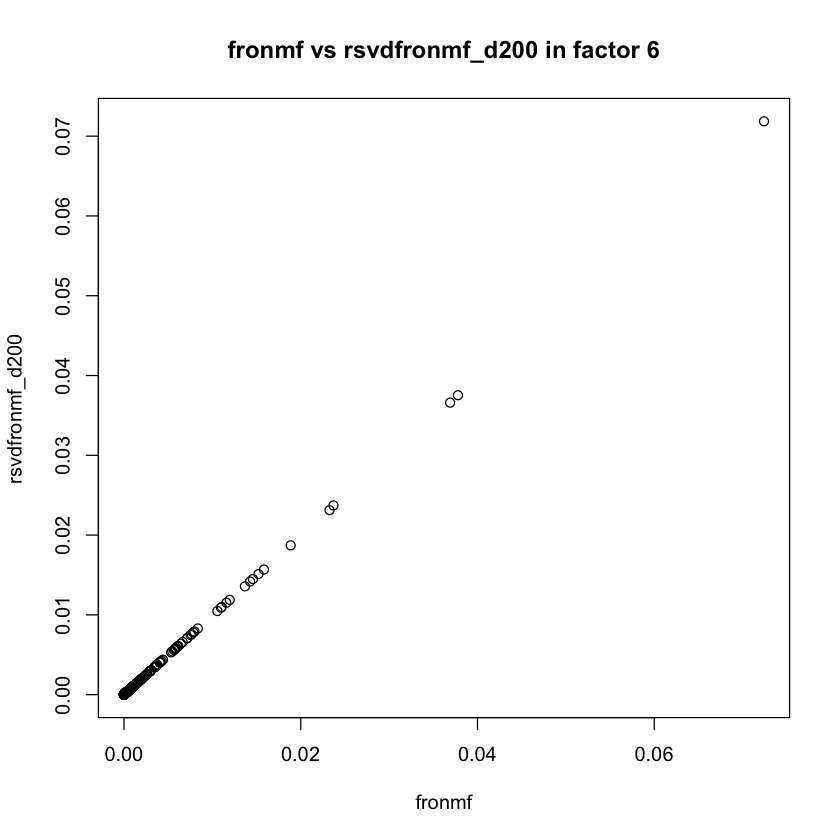

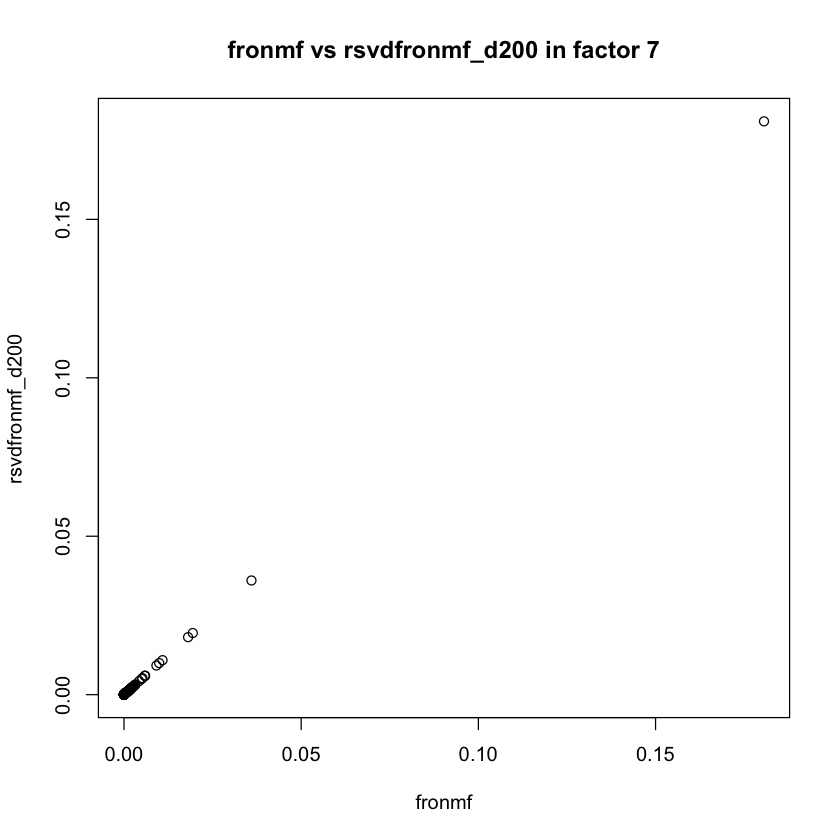

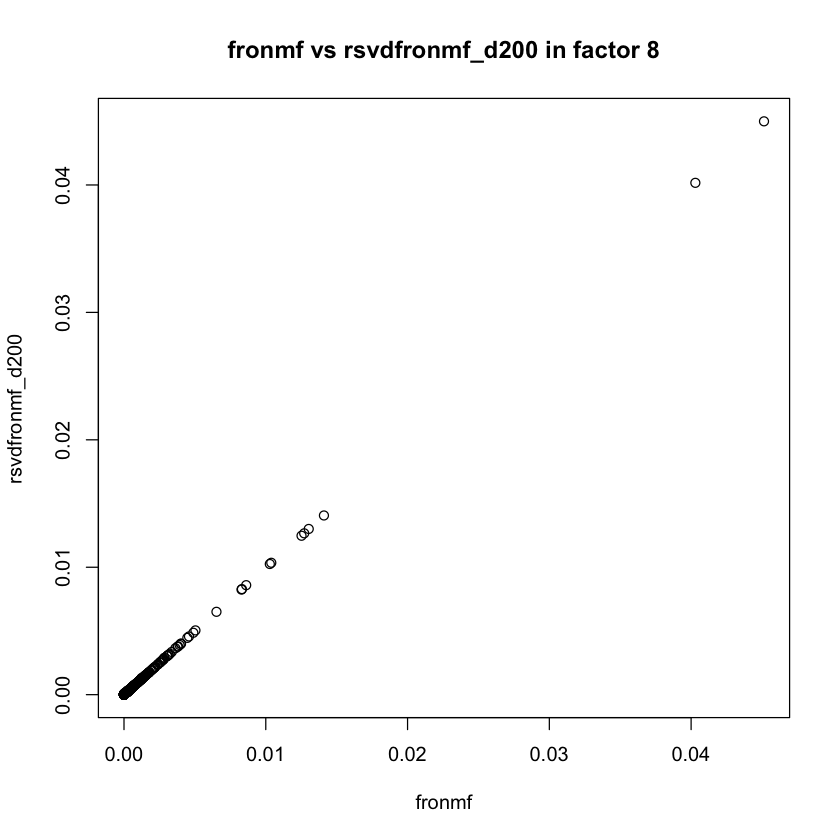

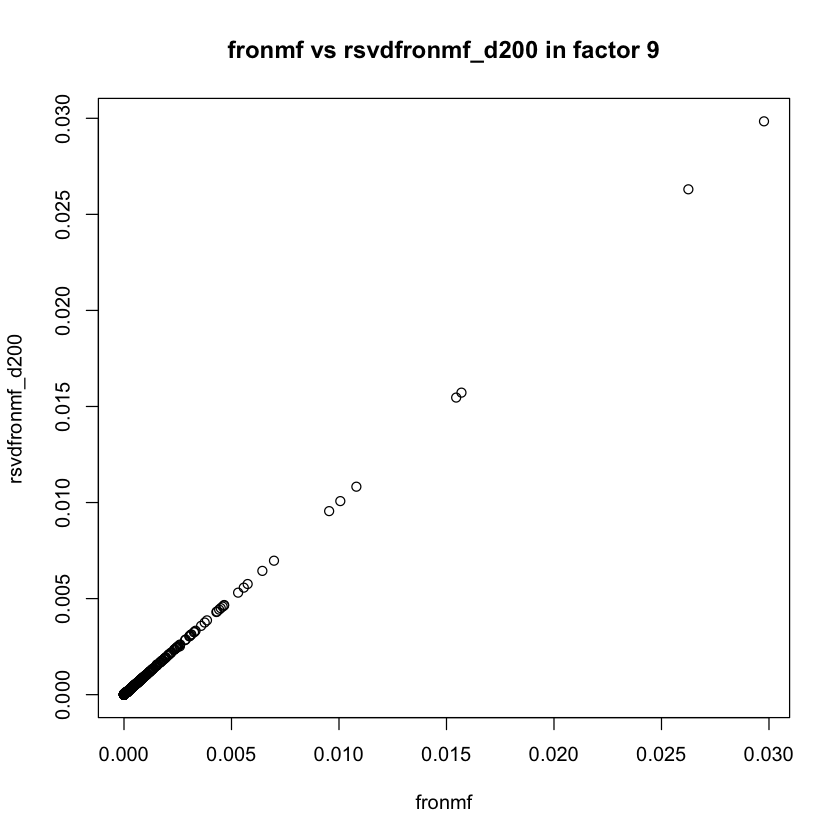

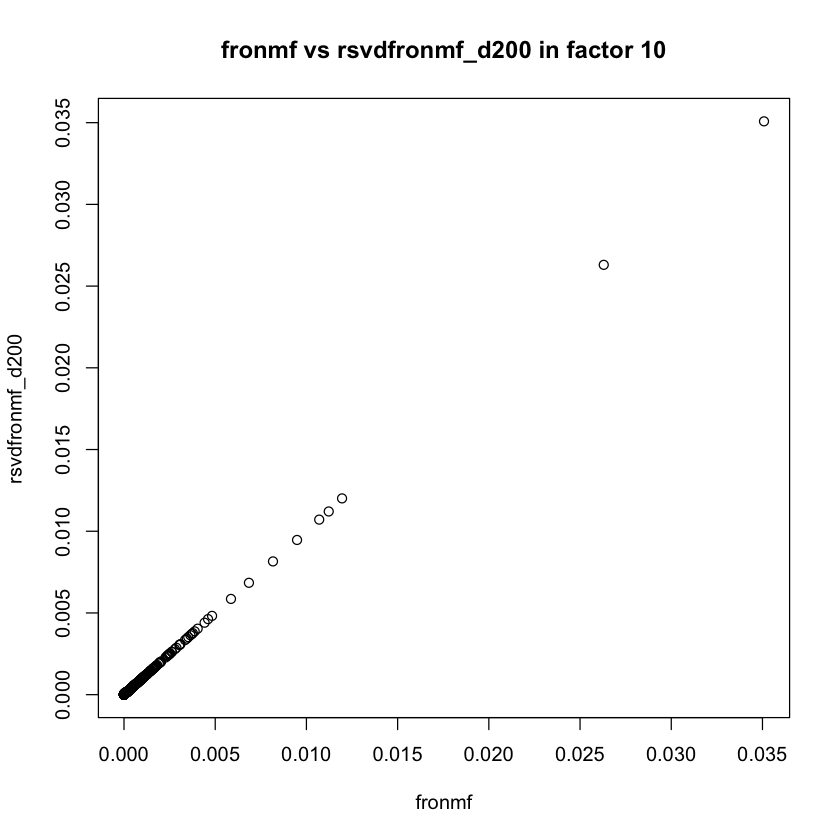

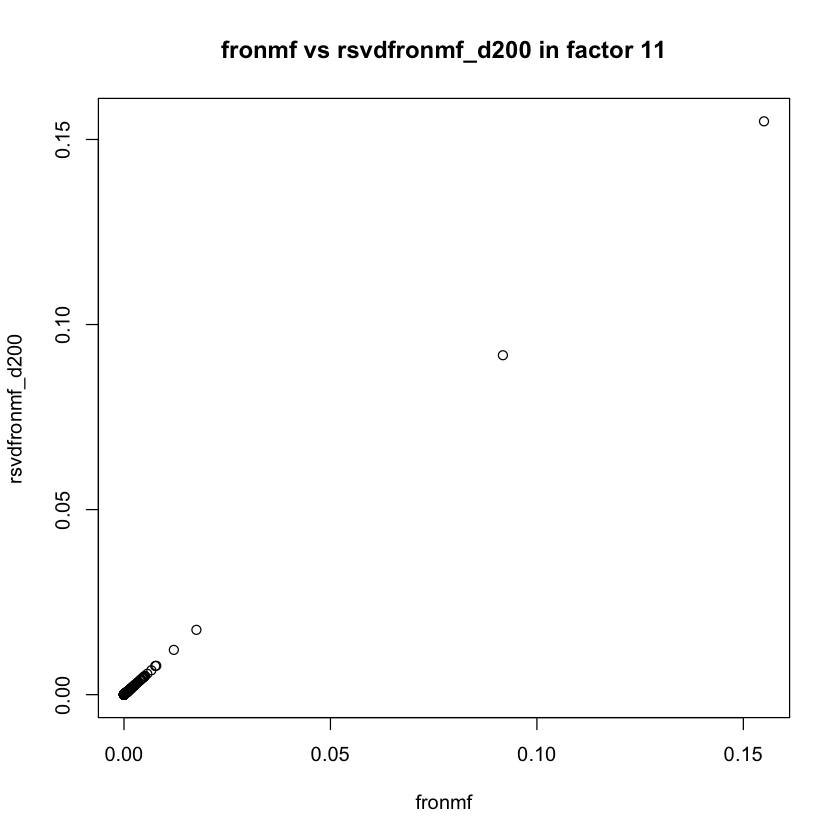

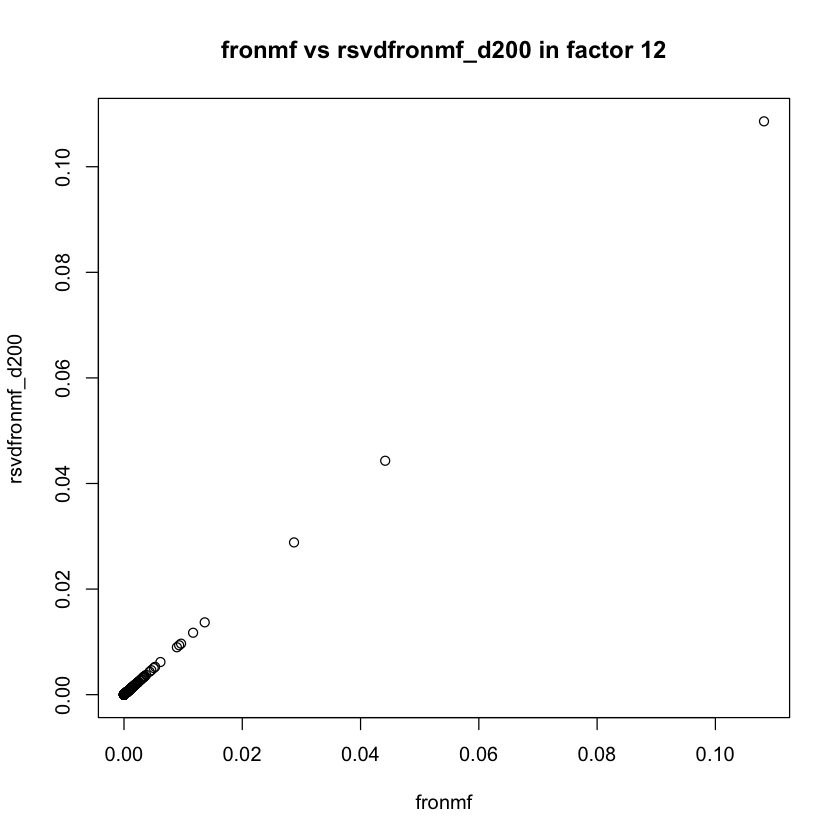

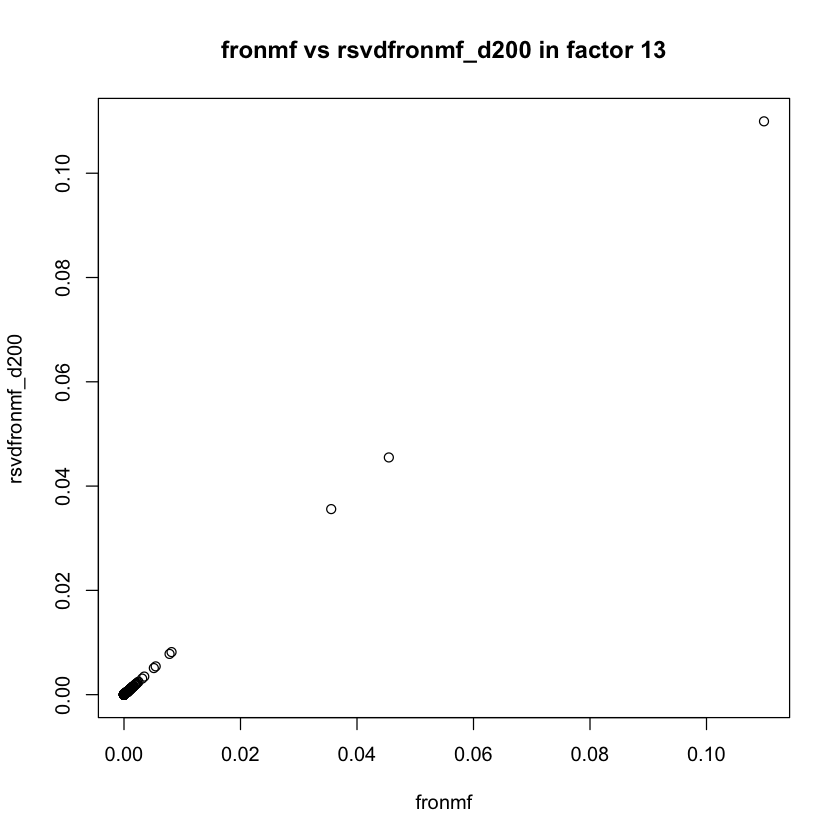

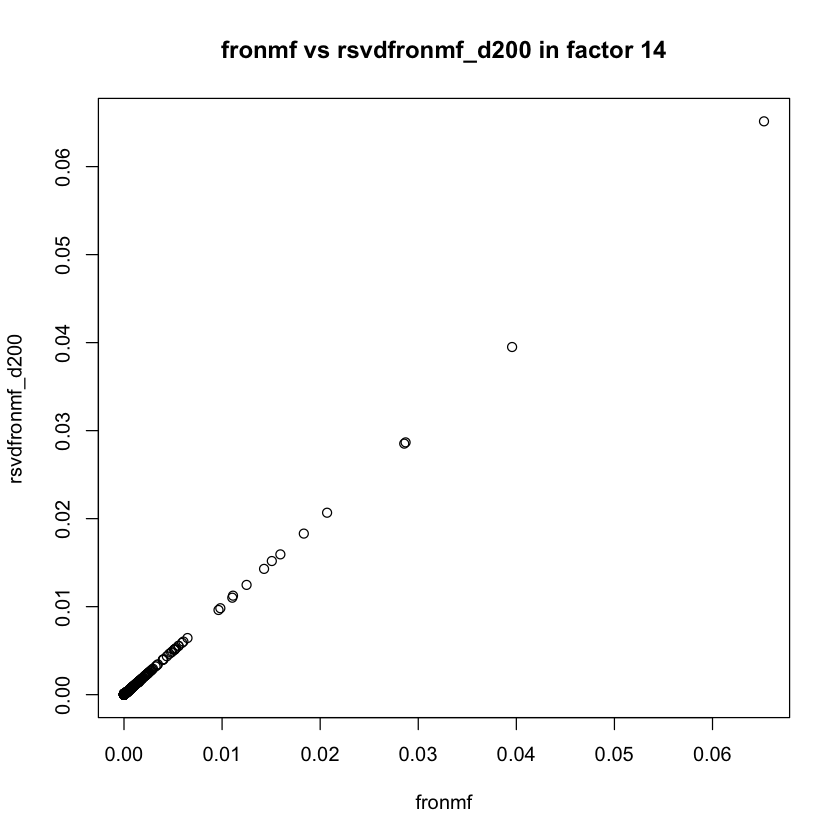

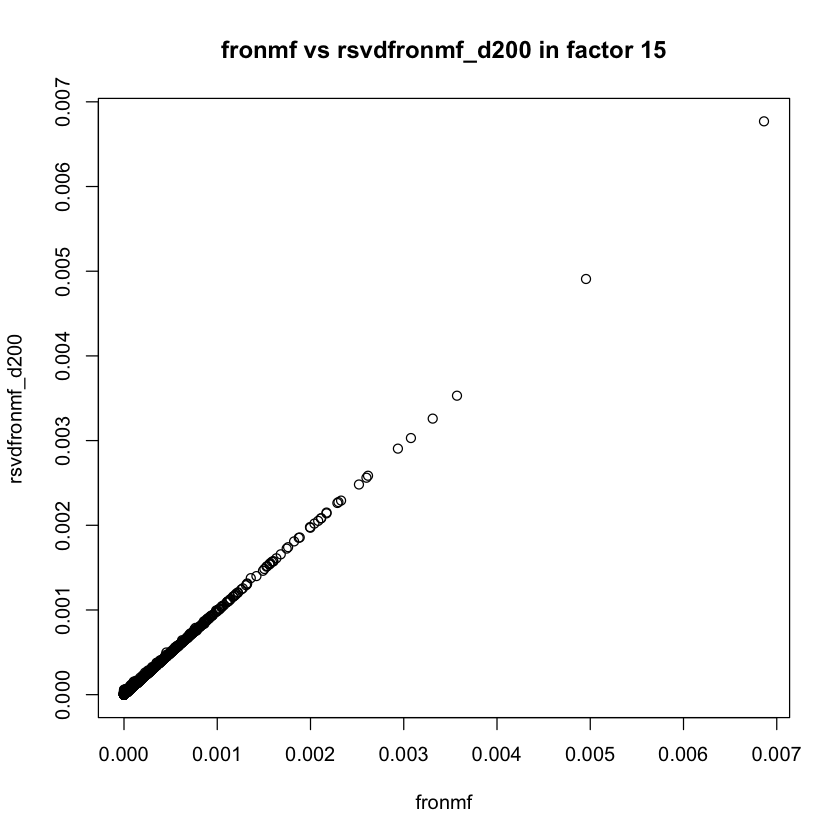

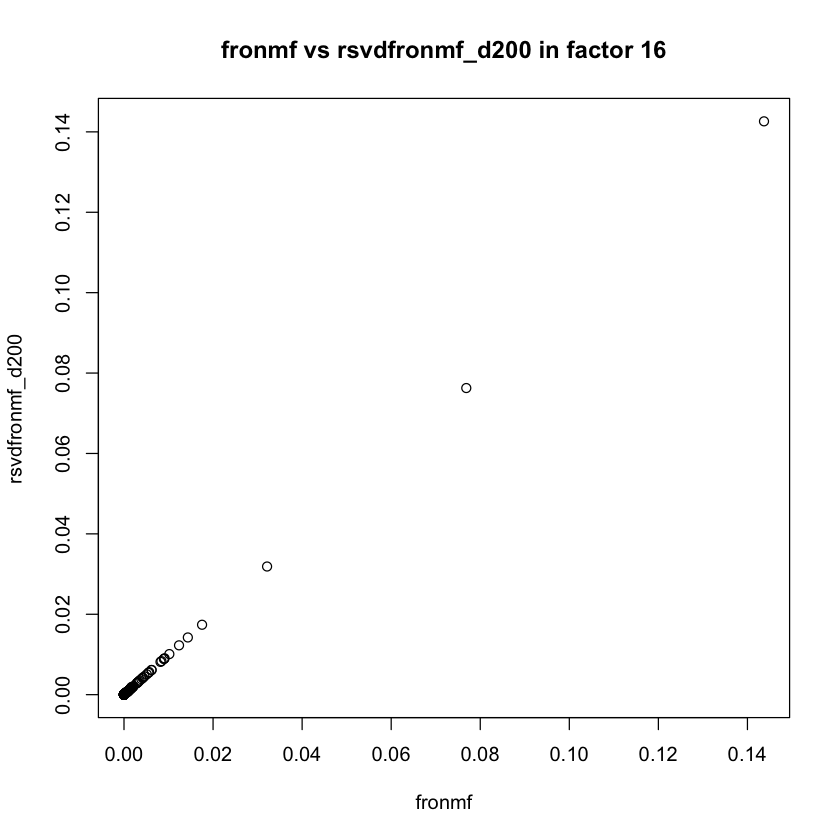

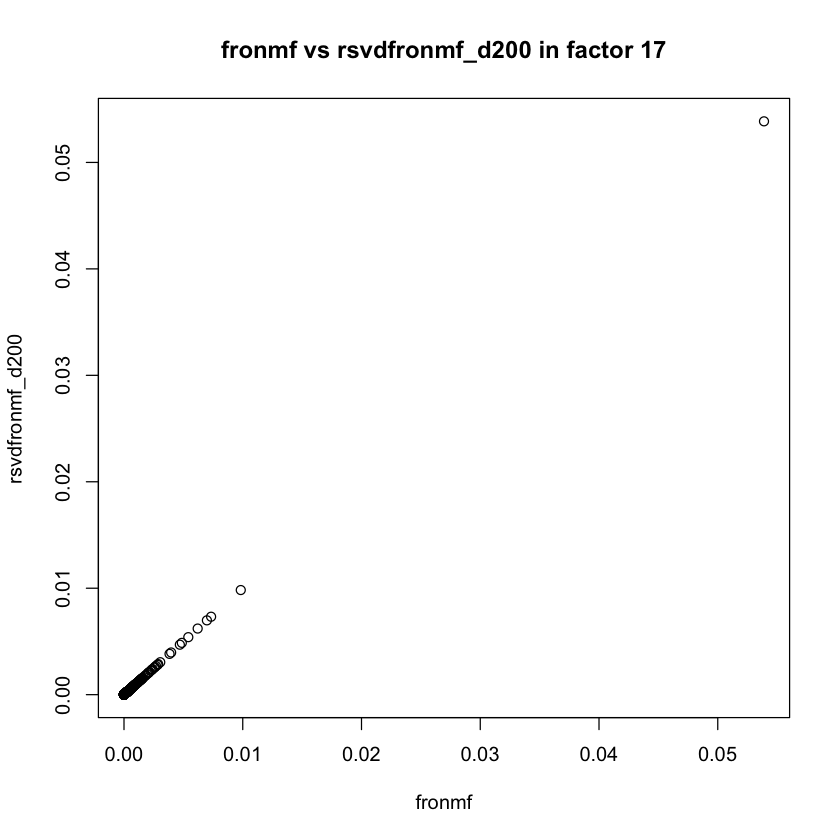

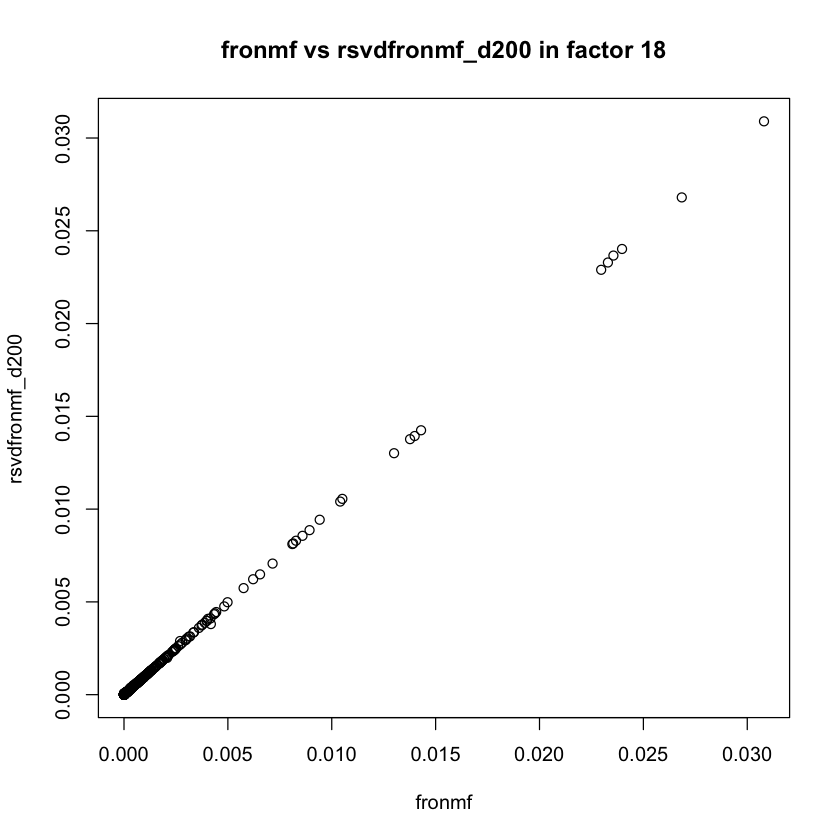

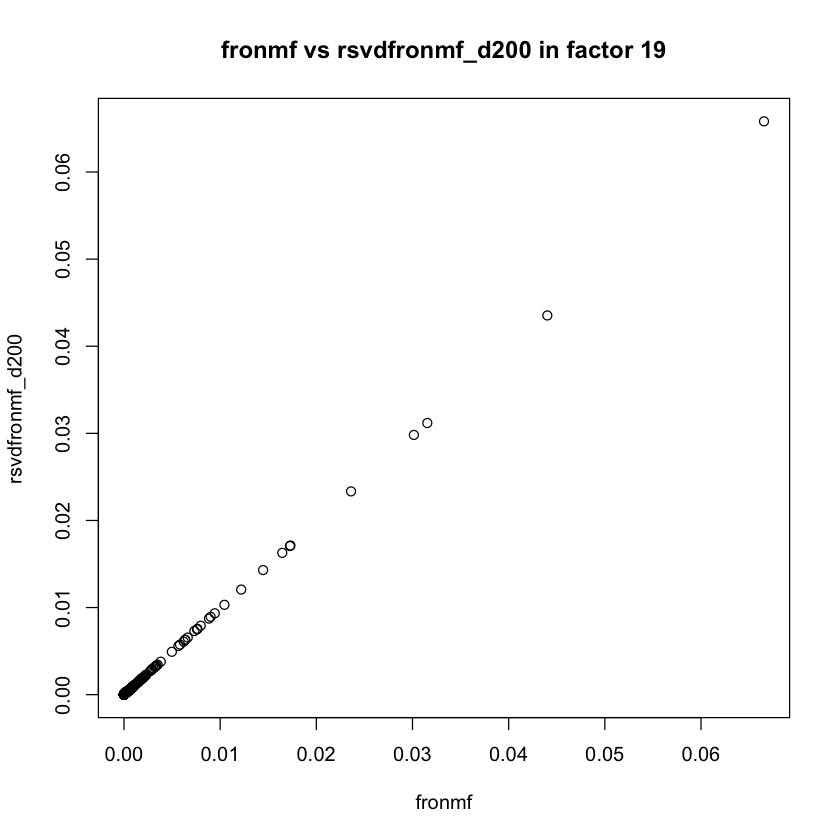

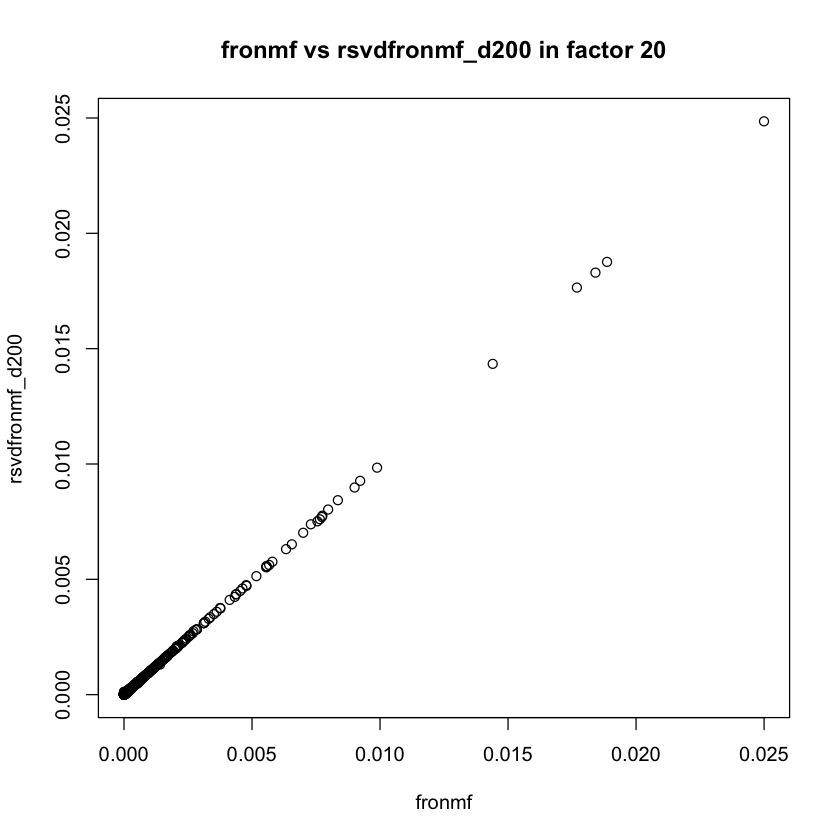

In [4]:
K = ncol(f1)
for(k in 1:K){
    plot(f1[,k], f2[,k], xlab = method1, ylab = method2, 
         main = sprintf("%s vs %s in factor %d", method1, method2, k))
}